<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Scatter%2C_Corr_and_Linear_Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install_github("OpenIntroStat/openintro")

ERROR: ignored

In [ ]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata



# Cut function 

When we have a numerical variable and want to convert it into categorical.

we use cut() function that takes two arguments: the continuous variable you want to discretize and the number of breaks that you want to make in that continuous variable in order to discretize it.

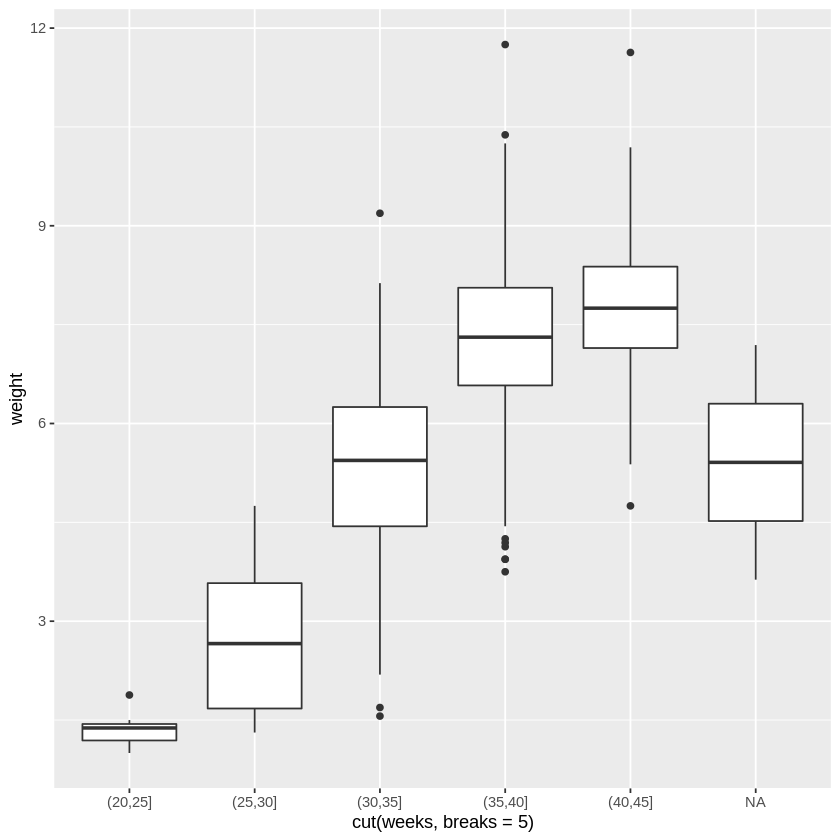

In [ ]:
# Boxplot of weight vs. weeks
ggplot(data = ncbirths, 
       aes(x = cut(weeks, breaks = 5), y = weight)) + 
  geom_boxplot()

# Importing datasets

Datasets are already imported and I'm going to use:

- mammals

- bdims

- smoking

In [ ]:
print('The bdims dataset contains body girth and skeletal diameter measurements for 507 physically active individuals.')
str(bdims)
print('Mammals dataset contains information about different species of mammals, including their body weight, brain weight, gestation time, and a few other variables.')
str(mammals)
print('Smoking dataset contains information on the smoking habits of 1,691 citizens of the United Kingdom.')
str(smoking)

[1] "The bdims dataset contains body girth and skeletal diameter measurements for 507 physically active individuals."
tibble [507 × 25] (S3: tbl_df/tbl/data.frame)
 $ bia_di: num [1:507] 42.9 43.7 40.1 44.3 42.5 43.3 43.5 44.4 43.5 42 ...
 $ bii_di: num [1:507] 26 28.5 28.2 29.9 29.9 27 30 29.8 26.5 28 ...
 $ bit_di: num [1:507] 31.5 33.5 33.3 34 34 31.5 34 33.2 32.1 34 ...
 $ che_de: num [1:507] 17.7 16.9 20.9 18.4 21.5 19.6 21.9 21.8 15.5 22.5 ...
 $ che_di: num [1:507] 28 30.8 31.7 28.2 29.4 31.3 31.7 28.8 27.5 28 ...
 $ elb_di: num [1:507] 13.1 14 13.9 13.9 15.2 14 16.1 15.1 14.1 15.6 ...
 $ wri_di: num [1:507] 10.4 11.8 10.9 11.2 11.6 11.5 12.5 11.9 11.2 12 ...
 $ kne_di: num [1:507] 18.8 20.6 19.7 20.9 20.7 18.8 20.8 21 18.9 21.1 ...
 $ ank_di: num [1:507] 14.1 15.1 14.1 15 14.9 13.9 15.6 14.6 13.2 15 ...
 $ sho_gi: num [1:507] 106 110 115 104 108 ...
 $ che_gi: num [1:507] 89.5 97 97.5 97 97.5 ...
 $ wai_gi: num [1:507] 71.5 79 83.2 77.8 80 82.5 82 76.8 68.5 77.5 ...
 $ nav_gi: 

# Mammals dataset

## Scatter brain weight vs body weight.

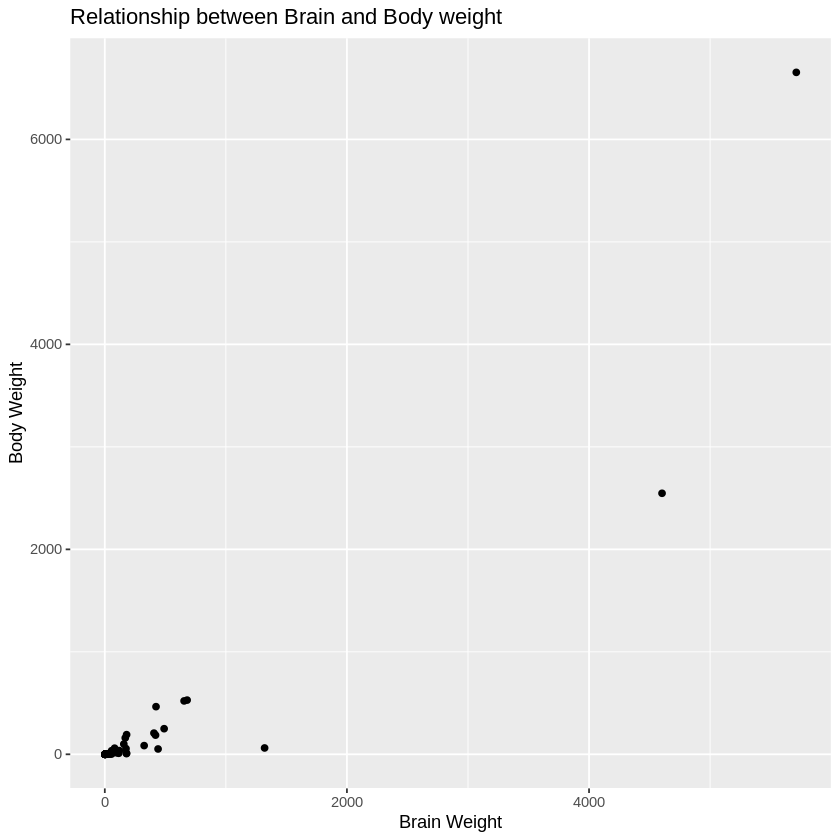

In [ ]:
# Scatter brain weight vs body weight.
ggplot(mammals, aes(brain_wt, body_wt)) + 
  geom_point() + 
  labs(x= 'Brain Weight', y='Body Weight', title='Relationship between Brain and Body weight'  )


## Log scales in scatter

`geom_smooth()` using formula 'y ~ x'



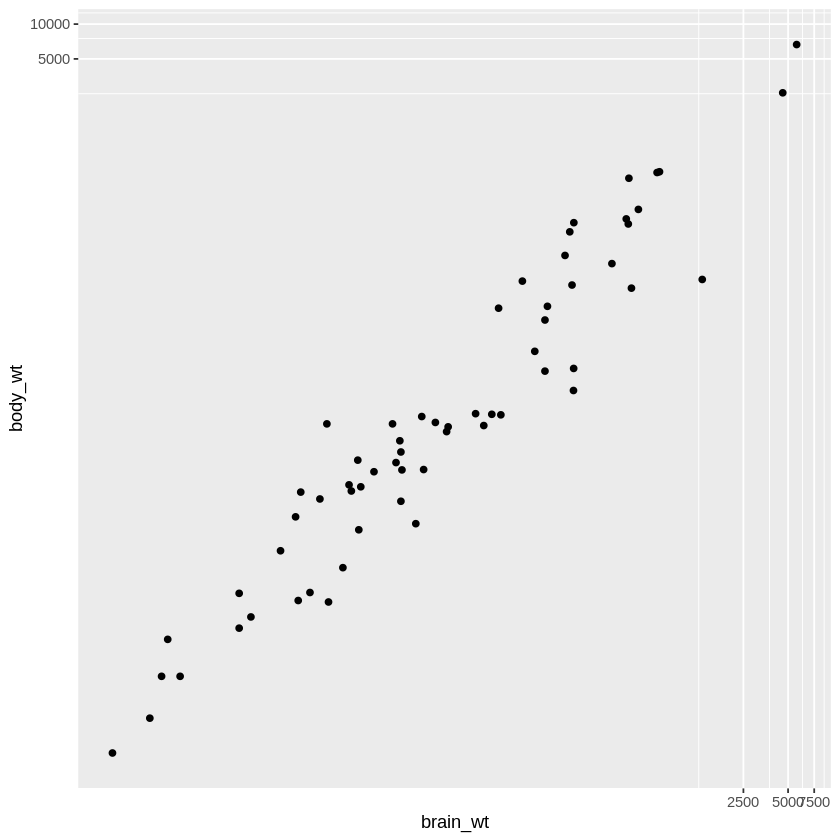

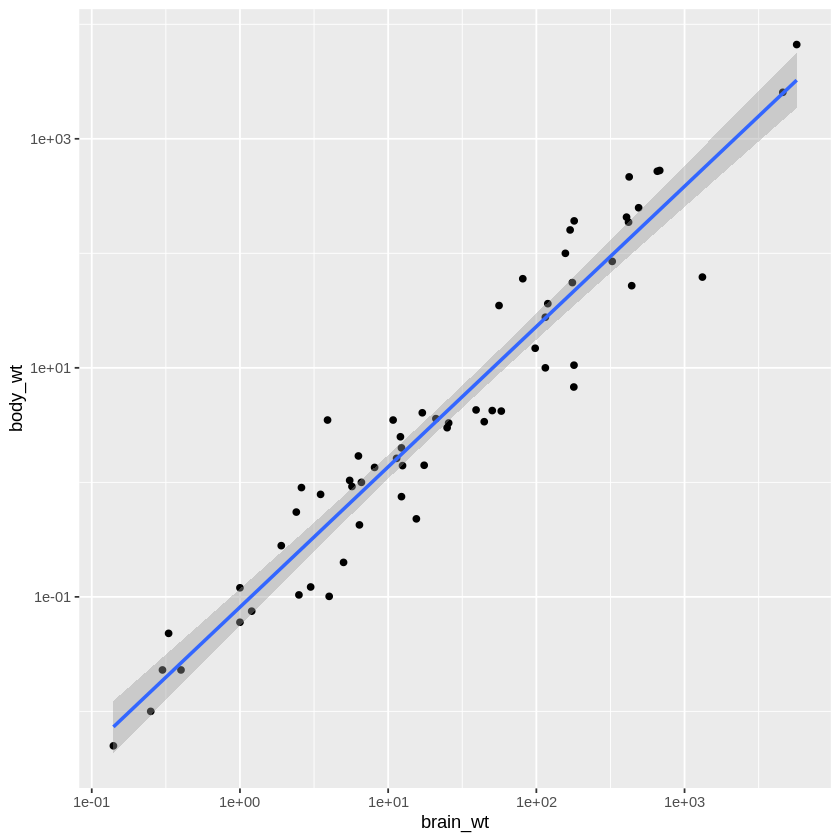

In [ ]:
# Scatterplot with coord_trans()
ggplot(data = mammals, aes(brain_wt, body_wt)) +
  geom_point() + 
  coord_trans(x = "log10", y = "log10") 

# or I can also use:
# Scatterplot with scale_x_log10() and scale_y_log10() with best fit lm
ggplot(data = mammals, aes(brain_wt, body_wt)) +
  geom_point() +
  scale_x_log10() + 
  scale_y_log10() + 
  geom_smooth(method = 'lm')

##  Calculate (Pearson) correlation coeficient.

abs(corr) > 0.7 "Strong linear relationship"

abs(corr) > 0.3 < 0.7 "Moderate linear relationship"

abs(corr) < 0.3 "Weak linear relationship"

In [ ]:
# Compute correlation
mammals %>%
  summarize(N = n(), pearson_r = cor(log10(brain_wt), log10(body_wt)))

# Compute correlation for all non-missing pairs
mammals %>%
  summarize(N = n(), pearson_r = cor(log10(brain_wt), log10(body_wt), use = "pairwise.complete.obs"))

N,pearson_r
<int>,<dbl>
62,0.9595748


N,pearson_r
<int>,<dbl>
62,0.9595748


# bdims dataset

# Scatter brain weight vs body weight + Best fit Lm 

`geom_smooth()` using formula 'y ~ x'



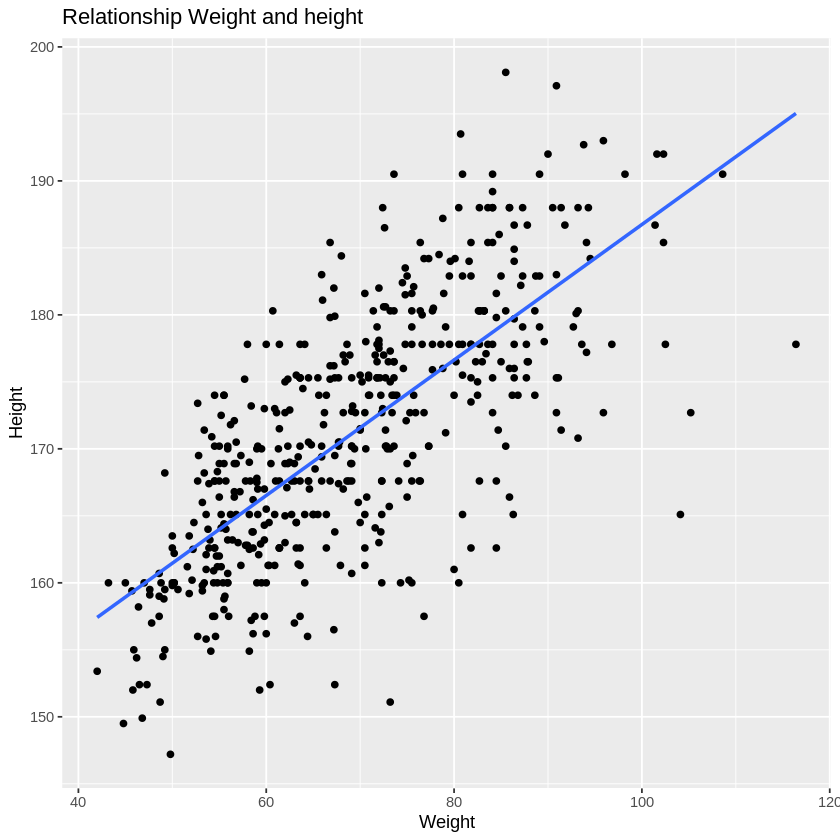

In [ ]:
# Scatter weight vs height.
ggplot(bdims, aes(wgt, hgt)) + 
  geom_point() + 
  labs(x= 'Weight', y='Height', title='Relationship Weight and height'  ) + 
  geom_smooth(method = "lm", se = FALSE)


## Scatter weight vs height, colored by gender.

In [ ]:
# First I map sex 0 1 to Female and Male respectively
# I create a new column directly. Numerical sex may still be useful.
bdims <- bdims %>%
  mutate(gender = factor(ifelse(bdims$sex==0, 'Female', 'Male')))

`geom_smooth()` using formula 'y ~ x'



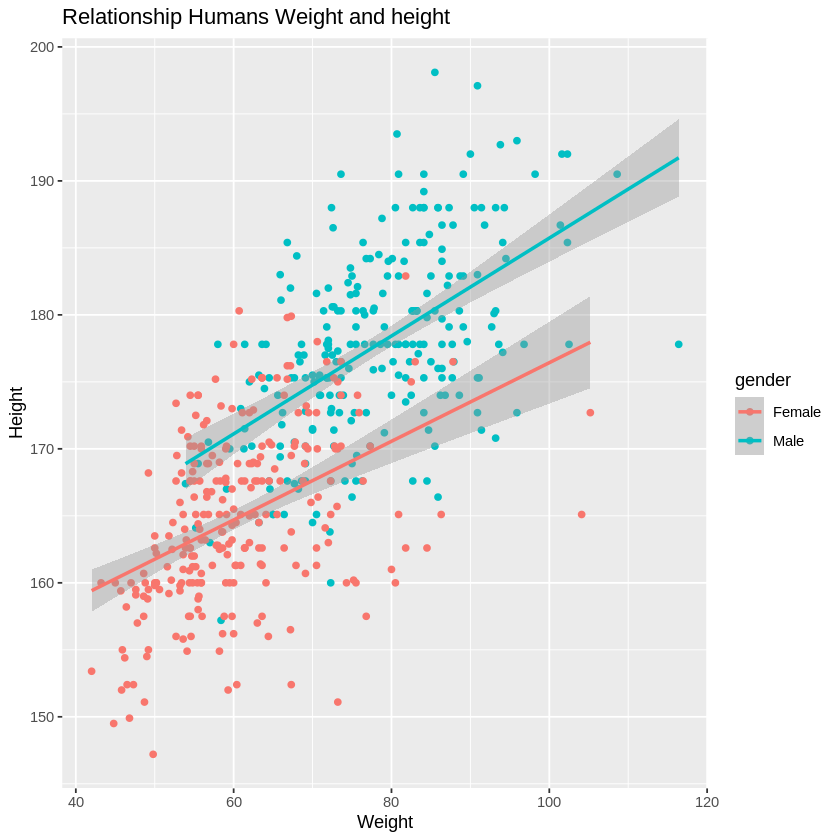

In [ ]:
# Scatter weight vs height, color=gender
ggplot(bdims, aes(wgt, hgt, color=gender)) + 
  geom_point() + 
  labs(x= 'Weight', y='Height', title='Relationship Humans Weight and height') + 
  geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'



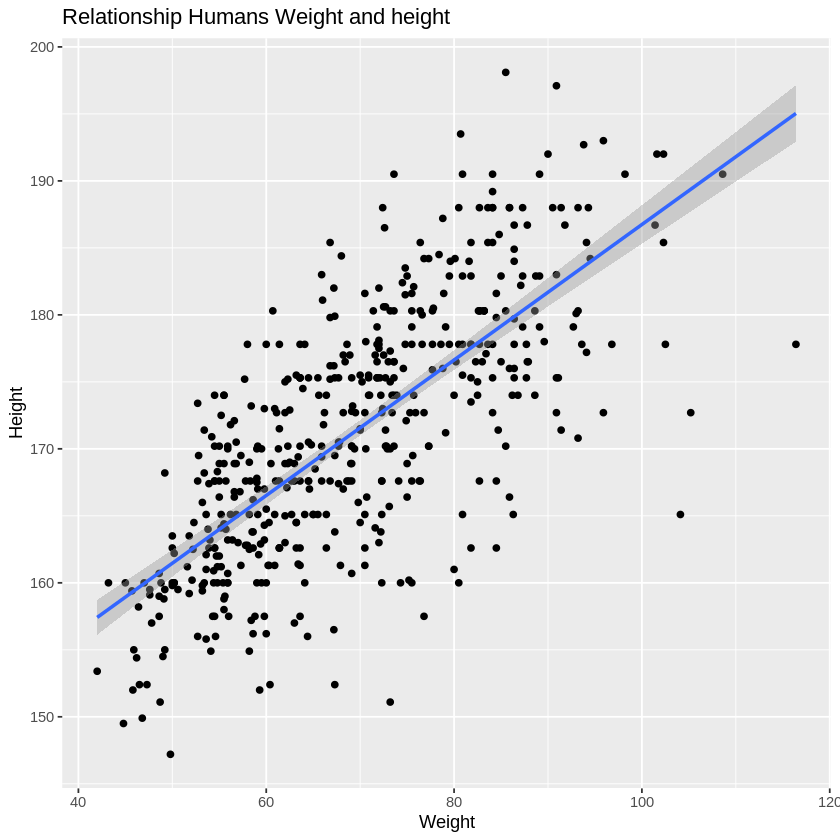

In [ ]:
# Scatter weight vs height
ggplot(bdims, aes(wgt, hgt)) + 
  geom_point() + 
  labs(x= 'Weight', y='Height', title='Relationship Humans Weight and height') + 
  geom_smooth(method = "lm")

## Calculate linear model parameters

### Pearson r, mean and sd of variables.

In [ ]:
print('Linear model has a slope and intercept of:')
bdims_summary <- bdims %>%
  summarize(N = n(), pearson_r = cor(wgt, hgt), mean_wgt = mean(wgt), sd_wgt = sd(wgt), mean_hgt = mean(hgt), sd_hgt = sd(hgt))

bdims_summary

[1] "Linear model has a slope and intercept of:"


N,pearson_r,mean_wgt,sd_wgt,mean_hgt,sd_hgt
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
507,0.7173011,69.14753,13.34576,171.1438,9.407205


### B0 (intercept) and B1 (Slope)

Calculating B1 (Slope) from pearson correlation:

B1 = r(x,y) . sd(y) / sd(x)

In [ ]:
# Add slope and intercept
bdims_summary %>%
  mutate(slope = pearson_r * sd_hgt / sd_wgt, 
         intercept = mean_hgt - slope * mean_wgt)

N,pearson_r,mean_wgt,sd_wgt,mean_hgt,sd_hgt,slope,intercept
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
507,0.7173011,69.14753,13.34576,171.1438,9.407205,0.5056136,136.1819


### Calculating parameters with lm function

In [ ]:
# As always y ~ x
model_hgt_wgt <- lm(formula = hgt ~ wgt , data= bdims)
model_hgt_wgt


Call:
lm(formula = hgt ~ wgt, data = bdims)

Coefficients:
(Intercept)          wgt  
   136.1819       0.5056  


### More of lm model.

In [ ]:
# This model is class 'lm'
class(model_hgt_wgt)

# Display coeficients.
coef(model_hgt_wgt)

[1] "lm"

(Intercept)         wgt 
136.1818561   0.5056136

In [ ]:
# Print summary of model
summary(model_hgt_wgt)


Call:
lm(formula = hgt ~ wgt, data = bdims)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.7162  -3.8782   0.0083   4.6532  18.6882 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 136.18186    1.53908   88.48   <2e-16 ***
wgt           0.50561    0.02186   23.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.561 on 505 degrees of freedom
Multiple R-squared:  0.5145,	Adjusted R-squared:  0.5136 
F-statistic: 535.2 on 1 and 505 DF,  p-value: < 2.2e-16


Residual standard error: 6.561 (This is the RMSE) on 505 degrees of freedom (n-2)

In [ ]:
# From broom library use augment. Gives a data frame of fitted values, residuals and other statistical measures.
model_df <- augment(model_hgt_wgt)

glimpse(model_df)

Rows: 507
Columns: 8
$ hgt        <dbl> 174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175…
$ wgt        <dbl> 65.6, 71.8, 80.7, 72.6, 78.8, 74.8, 86.4, 78.4, 62.0, 81.6,…
$ .fitted    <dbl> 169.3501, 172.4849, 176.9849, 172.8894, 176.0242, 174.0018,…
$ .resid     <dbl> 4.64989456, 2.81509051, 16.51512985, 13.61059966, 11.175795…
$ .hat       <dbl> 0.002112029, 0.002050453, 0.003453240, 0.002104644, 0.00300…
$ .sigma     <dbl> 6.564314, 6.566388, 6.526114, 6.539486, 6.548637, 6.559070,…
$ .cooksd    <dbl> 5.326494e-04, 1.895118e-04, 1.101576e-02, 4.547600e-03, 4.3…
$ .std.resid <dbl> 0.709458061, 0.429499424, 2.521492426, 2.076630725, 1.70591…


In [ ]:
# Predict with the model with a person of weight 72kg.:

predict(model_hgt_wgt, newdata = data.frame(wgt= 72))

1 
172.586

We see that parameters calculated via lm function and direct formulas are the same.

### Outliers

#### Leverage

In [ ]:
# To compute leverage we use augment func from broom

model_hgt_wgt %>%
  augment() %>%
  arrange(desc(.hat)) %>%
  head()

hgt,wgt,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
177.8,116.4,195.0353,-17.2352741,0.02674727,6.521320,9.742797e-02,-2.66274695
190.5,108.6,191.0915,-0.5914884,0.01924313,6.567534,8.129511e-05,-0.09103116
172.7,105.2,189.3724,-16.6724023,0.01639462,6.524760,5.471105e-02,-2.56219542
165.1,104.1,188.8162,-23.7162274,0.01552797,6.480711,1.046690e-01,-3.64307768
177.8,102.5,188.0072,-10.2072457,0.01431533,6.551602,1.783041e-02,-1.56698227
192.0,102.3,187.9061,4.0938770,0.01416774,6.565020,2.837809e-03,0.62843128


#### Influential

A high leverage point  is influential if it is also far from fhat(X)



In [ ]:
# Rank influential point (cooksd)
model_hgt_wgt %>%
  augment() %>%
  arrange(desc(.cooksd)) %>%
  head()

hgt,wgt,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
165.1,104.1,188.8162,-23.71623,0.015527974,6.480711,0.10466905,-3.643078
177.8,116.4,195.0353,-17.23527,0.026747272,6.521320,0.09742797,-2.662747
172.7,105.2,189.3724,-16.67240,0.016394624,6.524760,0.05471105,-2.562195
198.1,85.5,179.4118,18.68818,0.004939466,6.514355,0.02023645,2.855400
197.1,90.9,182.1421,14.95787,0.007222633,6.533457,0.01904366,2.288065
177.8,102.5,188.0072,-10.20725,0.014315326,6.551602,0.01783041,-1.566982


#### Outliers

Observations can be outliers for a number of different reasons. Statisticians must always be careful—and more importantly, transparent—when dealing with outliers. Sometimes, a better model fit can be achieved by simply removing outliers and re-fitting the model. However, one must have strong justification for doing this. A desire to have a higher  is not a good enough reason!

## Correlation 

In [ ]:
# Correlation
bdims %>%
  summarize(N = n(), r = cor(hgt, wgt))

N,r
<int>,<dbl>
507,0.7173011


### Corr grouped_by sex

In [ ]:
# Correlation
bdims %>%
  group_by(sex) %>%
  summarize(N = n(), r = cor(hgt, wgt))

,sex,N,r
,<int>,<int>,<dbl>
1,0,260,0.4310593
2,1,247,0.5347418
